In [ ]:
import pandas as pd
import numpy as np 
import librosa 
import librosa.display
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.preprocessing import MultiLabelBinarizer
from glob import glob 

import tensorflow as tf
import keras


### Data Load

In [3]:
dev_path = r"./FSD50K.ground_truth/dev.csv"
raw_data = pd.read_csv(dev_path, dtype = {'fname': 'string'})
train_data = raw_data[raw_data['split'] == 'train']
val_data = raw_data[raw_data['split'] == 'val']

In [6]:
vocab_path = r"./FSD50K.ground_truth/vocabulary.csv"
vocab = pd.read_csv(vocab_path, header=None, names = ['labels', 'mids'])

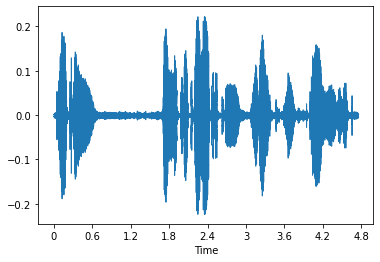

In [11]:
audio_path = r"./data/"
audio_sample = audio_path + '63.wav'
data, sample_rate = librosa.load(audio_sample, sr=None)
librosa.display.waveshow(data, sr=sample_rate)
duration = len(data)/sample_rate
ipd.Audio(audio_sample)

In [12]:
print("Sample rate: ", str(sample_rate))
print("Sample length: ", str(duration))

Sample rate:  44100
Sample length:  4.748480725623582


### EDA

In [13]:
len(train_data.labels.unique())

1043

In [14]:
print("Minimum samples in any category: ", min(train_data.labels.value_counts()))
print("Maximum samples in any category: ", max(train_data.labels.value_counts()))

Minimum samples in any category:  1
Maximum samples in any category:  2458


In [15]:
leaf_nodes = train_data['labels'].apply(lambda x: x.split(',')[0])
len(leaf_nodes.unique())

196

In [16]:
one_hot_encoder = MultiLabelBinarizer()
train_data['mids'] = train_data['mids'].apply(lambda x: tuple(x.split(',')))
val_data['mids'] = val_data['mids'].apply(lambda x: tuple(x.split(',')))
# test_df['mids'] = test_df['mids'].apply(lambda x: tuple(x.split(',')))
one_hot_encoder.fit(train_data['mids'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


MultiLabelBinarizer()

In [17]:
train_label_vector = one_hot_encoder.transform(train_data['mids'])
val_label_vector = one_hot_encoder.transform(val_data['mids'])
label_mids_classes = one_hot_encoder.classes_
print("Number of Classes: " + str(len(label_mids_classes)))

Number of Classes: 200


In [18]:
d = set(vocab['labels']) - set(leaf_nodes)
d

{'Domestic_animals_and_pets', 'Music', 'Pour', 'Rail_transport'}

In [19]:
ohe = MultiLabelBinarizer()
train_data['labels'] = train_data['labels'].apply(lambda x: tuple(x.split(',')))
ohe.fit(train_data['labels'])

label_vector = ohe.transform(train_data['labels'])
label_vector_classes = ohe.classes_
len(label_vector_classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


200

In [20]:
train_data

,fname,labels,mids,split
0,64760,"(Electric_guitar, Guitar, Plucked_string_instr...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train
1,16399,"(Electric_guitar, Guitar, Plucked_string_instr...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train
2,16401,"(Electric_guitar, Guitar, Plucked_string_instr...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train
3,16402,"(Electric_guitar, Guitar, Plucked_string_instr...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train
4,16404,"(Electric_guitar, Guitar, Plucked_string_instr...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train
...,...,...,...,...
40961,102863,"(Fowl, Livestock_and_farm_animals_and_working_...","(/m/025rv6n, /m/0ch8v, /m/0jbk)",train
40962,389607,"(Fowl, Livestock_and_farm_animals_and_working_...","(/m/025rv6n, /m/0ch8v, /m/0jbk)",train
40963,90091,"(Fowl, Livestock_and_farm_animals_and_working_...","(/m/025rv6n, /m/0ch8v, /m/0jbk)",train
40964,244718,"(Fowl, Livestock_and_farm_animals_and_working_...","(/m/025rv6n, /m/0ch8v, /m/0jbk)",train


In [21]:
train_data.labels.value_counts()

(Wind_instrument_and_woodwind_instrument, Musical_instrument, Music)                                                         2458
(Bowed_string_instrument, Musical_instrument, Music)                                                                         1841
(Laughter, Human_voice)                                                                                                       708
(Piano, Keyboard_(musical), Musical_instrument, Music)                                                                        677
(Snare_drum, Drum, Percussion, Musical_instrument, Music)                                                                     630
                                                                                                                             ... 
(Fire, Rain, Water)                                                                                                             1
(Meow, Chicken_and_rooster, Cat, Domestic_animals_and_pets, Animal, Fowl, Livestock_and_fa

<function matplotlib.pyplot.show>

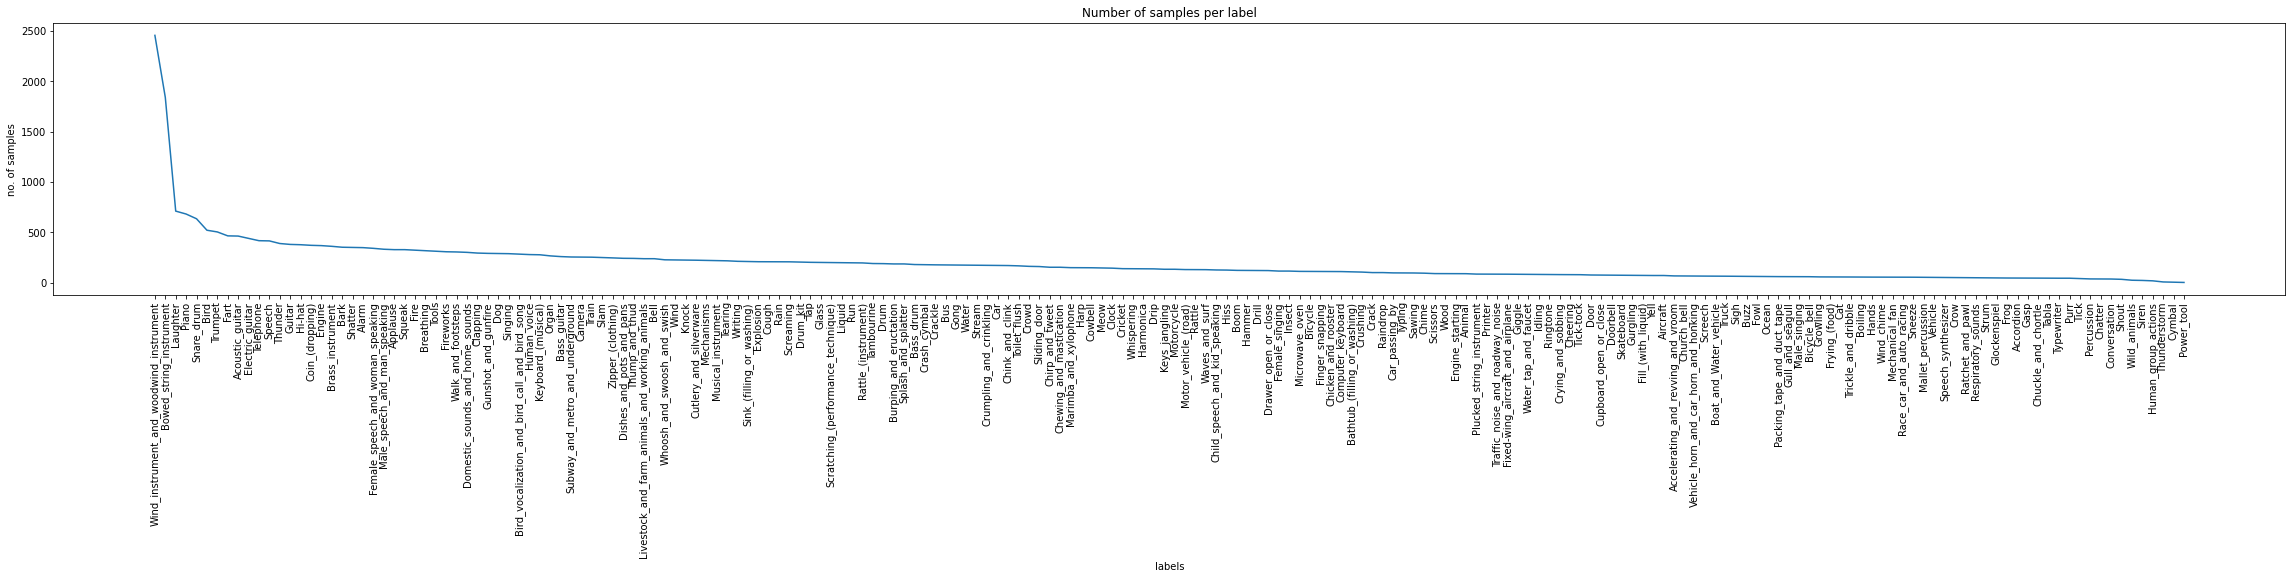

In [22]:
matplotlib.rcParams.update({'font.size': 10})
plt.figure(figsize=(40,5))
plt.plot(leaf_nodes.value_counts())
plt.title("Number of samples per label")
plt.xlabel('labels')
plt.ylabel('no. of samples')
plt.xticks(rotation='vertical')
plt.show

# 

In [23]:
train_data.groupby('labels').count().sort_values('fname', ascending=False)

,fname,mids,split
labels,,,
"(Wind_instrument_and_woodwind_instrument, Musical_instrument, Music)",2458,2458,2458
"(Bowed_string_instrument, Musical_instrument, Music)",1841,1841,1841
"(Laughter, Human_voice)",708,708,708
"(Piano, Keyboard_(musical), Musical_instrument, Music)",677,677,677
"(Snare_drum, Drum, Percussion, Musical_instrument, Music)",630,630,630
...,...,...,...
"(Gull_and_seagull, Waves_and_surf, Siren, Alarm, Bird, Wild_animals, Animal, Ocean, Water)",1,1,1
"(Gunshot_and_gunfire, Fireworks, Boom, Explosion)",1,1,1
"(Gunshot_and_gunfire, Tools, Explosion)",1,1,1


In [31]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


### Pre-processing

In [151]:
import os
import soundfile as sf
from multiprocessing import Pool

audioPath = r'./data/'
files_list = os.listdir(audioPath)
lf = len(files_list)

def replicate(data, min_clip_len):
  if len(data) < min_clip_len:
    tile_size = (min_clip_len // data.shape[0]) + 1
    data = np.tile(data, tile_size)[:min_clip_len]
  return data


def process_idx(idx):
  # print("in pool: "+str(idx))
  # return idx
  file_name = files_list[idx]
  file_path = audioPath + file_name 
  data, sample_rate = librosa.load(file_path)
  min_clip_len = int(sample_rate * 1)
  parts = []
  if len(data) < min_clip_len:
    data = replicate(data, min_clip_len)
    parts.append(data)
  else:
    overlap = int(sample_rate * 0.5) # 50% overlap
    for ix in range(0, len(data), overlap):
      clip_ix = data[ix:ix+min_clip_len]
      clip_ix = replicate(clip_ix, min_clip_len)
      parts.append(clip_ix)

  return parts

# if __name__ == '__main__':
#   # Multithreaded processing to process multiple files at the same time
#   pool = Pool(8)
#   o = pool.map_async(process_idx, range(lf))
#   res = o.get()
#   pool.close()
#   pool.join()

chunks = {}
for idx in range(lf):
  chunks[files_list[idx]] = process_idx(idx)

In [165]:
chunks['2706.wav']
len(chunks['2706.wav'][0])

22050

In [44]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [169]:
train_files = files_list[:130]
test_files = files_list[130:]

X_train_files = [file.split(".")[0] for file in train_files]

train = train_data.copy()
train = train[train.fname.isin(X_train_files)]

list1 = train.fname.to_list()

97

In [172]:
X_train = []
i=0
for k in list1:
    y = chunks[k+'.wav'][0]
    x = librosa.feature.mfcc(y=y, sr=22050).flatten()
    X_train.append(x)
X_train = np.asarray(X_train)

l = len(train_files)

In [173]:
X_test_files = [file.split(".")[0] for file in test_files]

test = val_data.copy()
test = test[test.fname.isin(X_test_files)]

list1 = test.fname.to_list()

In [174]:
X_test = []
for k in list1:
    y = chunks[k+'.wav'][0]
    x = librosa.feature.mfcc(y=y, sr=22050).flatten()
    X_test.append(x)
X_test = np.asarray(X_test)

In [ ]:
# train_audio_data.drop(columns = ['split', 'fname_x'], inplace=True)
# train_audio_data.rename(columns = {'fname_y':'audio_files'}, inplace=True)
# test_audio_data.drop(columns = ['split', 'fname_x'], inplace=True)
# test_audio_data.rename(columns = {'fname_y':'audio_files'}, inplace=True)

In [175]:
one_hot_encoder = MultiLabelBinarizer()
one_hot_encoder.fit(train['mids'])
train_label_vector = one_hot_encoder.transform(train['mids'])
label_mids_classes = one_hot_encoder.classes_
test_label_vector = one_hot_encoder.transform(test['mids'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['/m/03qjg', '/m/03qtq', '/m/06rvn', '/m/0l14_3'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))


In [176]:
label_mids_classes

array(['/m/01280g', '/m/012f08', '/m/0130jx', '/m/014zdl', '/m/015lz1',
       '/m/018vs', '/m/01bjv', '/m/01hgjl', '/m/01jt3m', '/m/01lsmm',
       '/m/01m2v', '/m/01qbl', '/m/01s0vc', '/m/01yrx', '/m/026t6',
       '/m/02_41', '/m/02hnl', '/m/02jz0l', '/m/02mk9', '/m/02sgy',
       '/m/02yds9', '/m/0316dw', '/m/0342h', '/m/0395lw', '/m/03m9d0z',
       '/m/03v3yw', '/m/03vt0', '/m/042v_gx', '/m/0463cq4', '/m/04rlf',
       '/m/04szw', '/m/05148p4', '/m/05r5wn', '/m/05tny_', '/m/068hy',
       '/m/06d_3', '/m/07jdr', '/m/07s0s5r', '/m/07yv9', '/m/085jw',
       '/m/09l8g', '/m/09ld4', '/m/09x0r', '/m/09xqv', '/m/0bm02',
       '/m/0bm0k', '/m/0brhx', '/m/0bt9lr', '/m/0f8s22', '/m/0fx80y',
       '/m/0g6b5', '/m/0j45pbj', '/m/0jb2l', '/m/0jbk', '/m/0k4j',
       '/m/0k65p', '/m/0l14md', '/m/0l15bq', '/m/0ngt1', '/t/dd00071',
       '/t/dd00077', '/t/dd00134'], dtype=object)

In [177]:
len(label_mids_classes)

62

In [178]:
ytrain = train_label_vector
ytest = test_label_vector

In [179]:
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [191]:
from sklearn.metrics import average_precision_score

n_ip, n_op = X_train.shape[1], ytrain.shape[1]
model = get_model(n_ip, n_op)
model.fit(X_train, ytrain, verbose=0, epochs=100)
yhat = model.predict(X_test)
yhat = yhat.round()
mAP = average_precision_score(ytest, yhat, average="micro")

In [192]:
mAP

0.1866778382907415